In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_diabetics=pd.read_csv('diabetes.csv')
# Create the dataframe
df_diabetics.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#import seaborn as sns
#sns.distplot(df_diabetics.BMI)


<AxesSubplot:xlabel='BMI'>

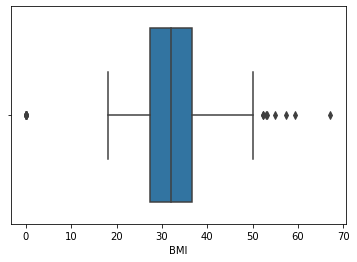

In [9]:
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['BMI'])


In [10]:
# Position of the Outlier
import numpy as np
print(np.where(df_diabetics['BMI']>50))


(array([120, 125, 177, 193, 247, 303, 445, 673], dtype=int64),)


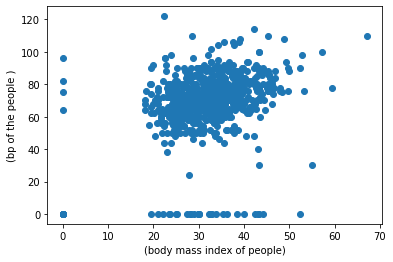

In [11]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_diabetics['BMI'],df_diabetics['BloodPressure'])
# x-axis label
ax.set_xlabel('(body mass index of people)')
# y-axis label
ax.set_ylabel('(bp of the people )')
plt.show()

In [12]:
# Position of the Outlier
print(np.where((df_diabetics['BMI']>50) & (df_diabetics['BloodPressure']<100)))


(array([120, 125, 193, 247, 303, 445], dtype=int64),)


In [13]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_diabetics['Age']))
print(z)


0      1.425995
1      0.190672
2      0.105584
3      1.041549
4      0.020496
         ...   
763    2.532136
764    0.531023
765    0.275760
766    1.170732
767    0.871374
Name: Age, Length: 768, dtype: float64


In [15]:
threshold = 2

# Position of the outlier
print(np.where(z > 2))


(array([ 12,  13,  28,  30,  53,  93, 115, 123, 129, 148, 186, 206, 212,
       221, 223, 263, 278, 294, 299, 319, 344, 361, 362, 363, 375, 388,
       453, 456, 459, 475, 479, 487, 489, 495, 509, 512, 519, 537, 552,
       557, 579, 582, 666, 674, 684, 759, 763], dtype=int64),)


In [17]:
# IQR
Q1 = np.percentile(df_diabetics['BMI'], 5, method='midpoint')
Q3 = np.percentile(df_diabetics['BMI'], 95, method='midpoint')
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

lower_lim = df_diabetics['BMI'].quantile(.05)
print(lower_lim)
upper_lim = df_diabetics['BMI'].quantile(.95)
print(upper_lim)

21.8
44.35
22.55
21.8
44.394999999999996


In [19]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_diabetics['BMI']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_diabetics['BMI']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())


Upper Bound: 50.550000000000004
8
Lower Bound: 13.35
11


In [18]:

Q1 = np.percentile([1,2,3,4,5,6,7,8,9,10], 5, method='midpoint')
print(Q1)
Q3 = np.percentile([1,2,3,4,5,6,7,8,9,10], 95, method='midpoint')
print(Q3)
IQR=Q3-Q1
print(IQR)
lower=Q1-(1.5*IQR)
print(lower)



1.5
9.5
8.0
-10.5
